# Intro a ML - Clasificación



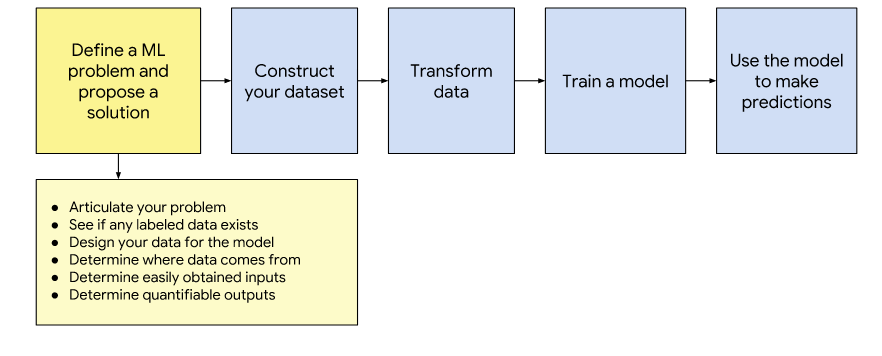

- Problema: Detección de tipos de tumores en mama
- Objetivo: Predecir que tipo de tumor es, resaltando malignos (hay benignos)
- Dataset: UCI dataset
- Inputs: 
    - "id",
    - "target",
    -  "radius", # (mean of distances from center to points on the perimeter)
     - "texture", # (standard deviation of gray-scale values)
     - "perimeter",
     - "area",
     - "smoothness", #(local variation in radius lengths)
     - "compactness", #(perimeter^2 / area - 1.0)
     - "concavity", # (severity of concave portions of the contour)
     - "concave_points", #(number of concave portions of the contour)
     - "symmetry", 
     - "fractal_dimension" #("coastline approximation" - 1)
- Outputs:
  - class:
    - benign
    - malignant 


## Obtenemos la información



In [18]:
# !pip install opendatasets --upgrade
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
DESCR_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"


In [19]:
!wget $DESCR_URL
!wget $DATA_URL
!cat wdbc.names

--2020-11-08 18:06:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4708 (4.6K) [application/x-httpd-php]
Saving to: ‘wdbc.names.1’

wdbc.names.1        100%[===================>]   4.60K  --.-KB/s    in 0s      

2020-11-08 18:06:36 (87.0 MB/s) - ‘wdbc.names.1’ saved [4708/4708]

--2020-11-08 18:06:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data.1’

wdbc.data.1         100%[===================>] 121.19K 

In [20]:
import pandas as pd
from sklearn.datasets import load_wine, load_iris, load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
# sns.set()

Para modificar los estilos, los siguientes links pueden ser de ayuda
- https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
- https://elitedatascience.com/python-seaborn-tutorial#step-10
- https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
- https://stackoverflow.com/questions/22543208/ggplot-styles-in-python
- https://seaborn.pydata.org/tutorial/aesthetics.html
- https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial 
- https://wellsr.com/python/how-to-make-seaborn-boxplots-in-python/#:~:text=Seaborn%20Box%20Plots%20with%20Multiple,passed%20to%20the%20y%20variable. 




In [21]:
# cargamos un dataset
from dataclasses import dataclass

@dataclass
class DataConfig:
  data: str
  target_names: dict
  feature_names: list


data = DataConfig(**{
    "data": './wdbc.data', 
    "target_names":{
        "B": "benign",
        "M": "malignant"
    },
    "feature_names": [
      "id",
      "target",
      "radius", # (mean of distances from center to points on the perimeter)
      "texture", # (standard deviation of gray-scale values)
      "perimeter",
      "area",
      "smoothness", #(local variation in radius lengths)
      "compactness", #(perimeter^2 / area - 1.0)
      "concavity", # (severity of concave portions of the contour)
      "concave_points", #(number of concave portions of the contour)
      "symmetry", 
      "fractal_dimension" #("coastline approximation" - 1)
    ]
})
data

DataConfig(data='./wdbc.data', target_names={'B': 'benign', 'M': 'malignant'}, feature_names=['id', 'target', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension'])

In [22]:
# creamos un dataframe con los nombres de columnas
df = pd.read_csv(data.data, index_col=False, names=data.feature_names)
df["target"] = df.target.apply(lambda r: data.target_names[r])

## Analisis Exploratorio
Normalmente el analisis se hace en estos pasos: 
- Analisis general del dataset (faltantes, maximos, minimos, errores...)
- Analisis univariado: por cada columna
- Analisis bivariado: correlaciones entre características.
- Puede ser muy extenso...

Este trabajo se conoce como EDA o Exploratory Data Analysis.

Libros y posts: 
- [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [R for Data Science](https://r4ds.had.co.nz/)
- [Bad Data Handbook - Cleaning Up The Data So You Can Get Back To Work](NO-LINK)
- [Python for Data Analysis-O'Reilly Media (2012)- Wes McKinney](NO-LINK)
- [Bookdown - Exploratory Visualizations](https://bookdown.org/max/FES/exploratory-visualizations.html)


In [23]:
# obtenemos 10 muestras
df.sample(10)r

,id,target,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
340,89813,benign,14.42,16.54,94.15,641.2,0.09751,0.11390,0.080070,0.042230,0.1912,0.06412
185,874158,benign,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048
339,89812,malignant,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.230800,0.141000,0.1797,0.05506
483,912558,benign,13.70,17.64,87.76,571.1,0.09950,0.07957,0.045480,0.031600,0.1732,0.06088
328,8953902,malignant,16.27,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.084880,0.1948,0.06277
83,8611792,malignant,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.193700,0.146900,0.1634,0.07224
293,891703,benign,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715
463,911320501,benign,11.60,18.36,73.88,412.7,0.08508,0.05855,0.033670,0.017770,0.1516,0.05859
360,901034302,benign,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185
330,896839,malignant,16.03,15.51,105.80,793.2,0.09491,0.13710,0.120400,0.070410,0.1782,0.05976


In [24]:
# Distribución de las clases
print(df.target.value_counts())

benign       357
malignant    212
Name: target, dtype: int64


vemos que la muestra está "bastante" balanceada

In [25]:
print(df.target.value_counts(normalize=True))

benign       0.627417
malignant    0.372583
Name: target, dtype: float64


In [26]:
# df = df.drop(columns='id')
df = df.set_index('id')

In [27]:
# Vemos información sobre las columnas
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [28]:
# Vemos nulos y tipo de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             569 non-null    object 
 1   radius             569 non-null    float64
 2   texture            569 non-null    float64
 3   perimeter          569 non-null    float64
 4   area               569 non-null    float64
 5   smoothness         569 non-null    float64
 6   compactness        569 non-null    float64
 7   concavity          569 non-null    float64
 8   concave_points     569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 53.3+ KB


Vemos que tampoco poseen valores nulos, por ende no hay que imputar datos

Vamos a ver que datos tenemos:


In [29]:
# columnas
features = df.columns[~df.columns.isin(['target'])]



In [30]:
# !pip install --upgrade pandas-profiling[notebook]

In [31]:
# vamos a generar un reporte automático con ProfileReport
# para aprender, deberíamos hacerlo a mano
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile.to_widgets()

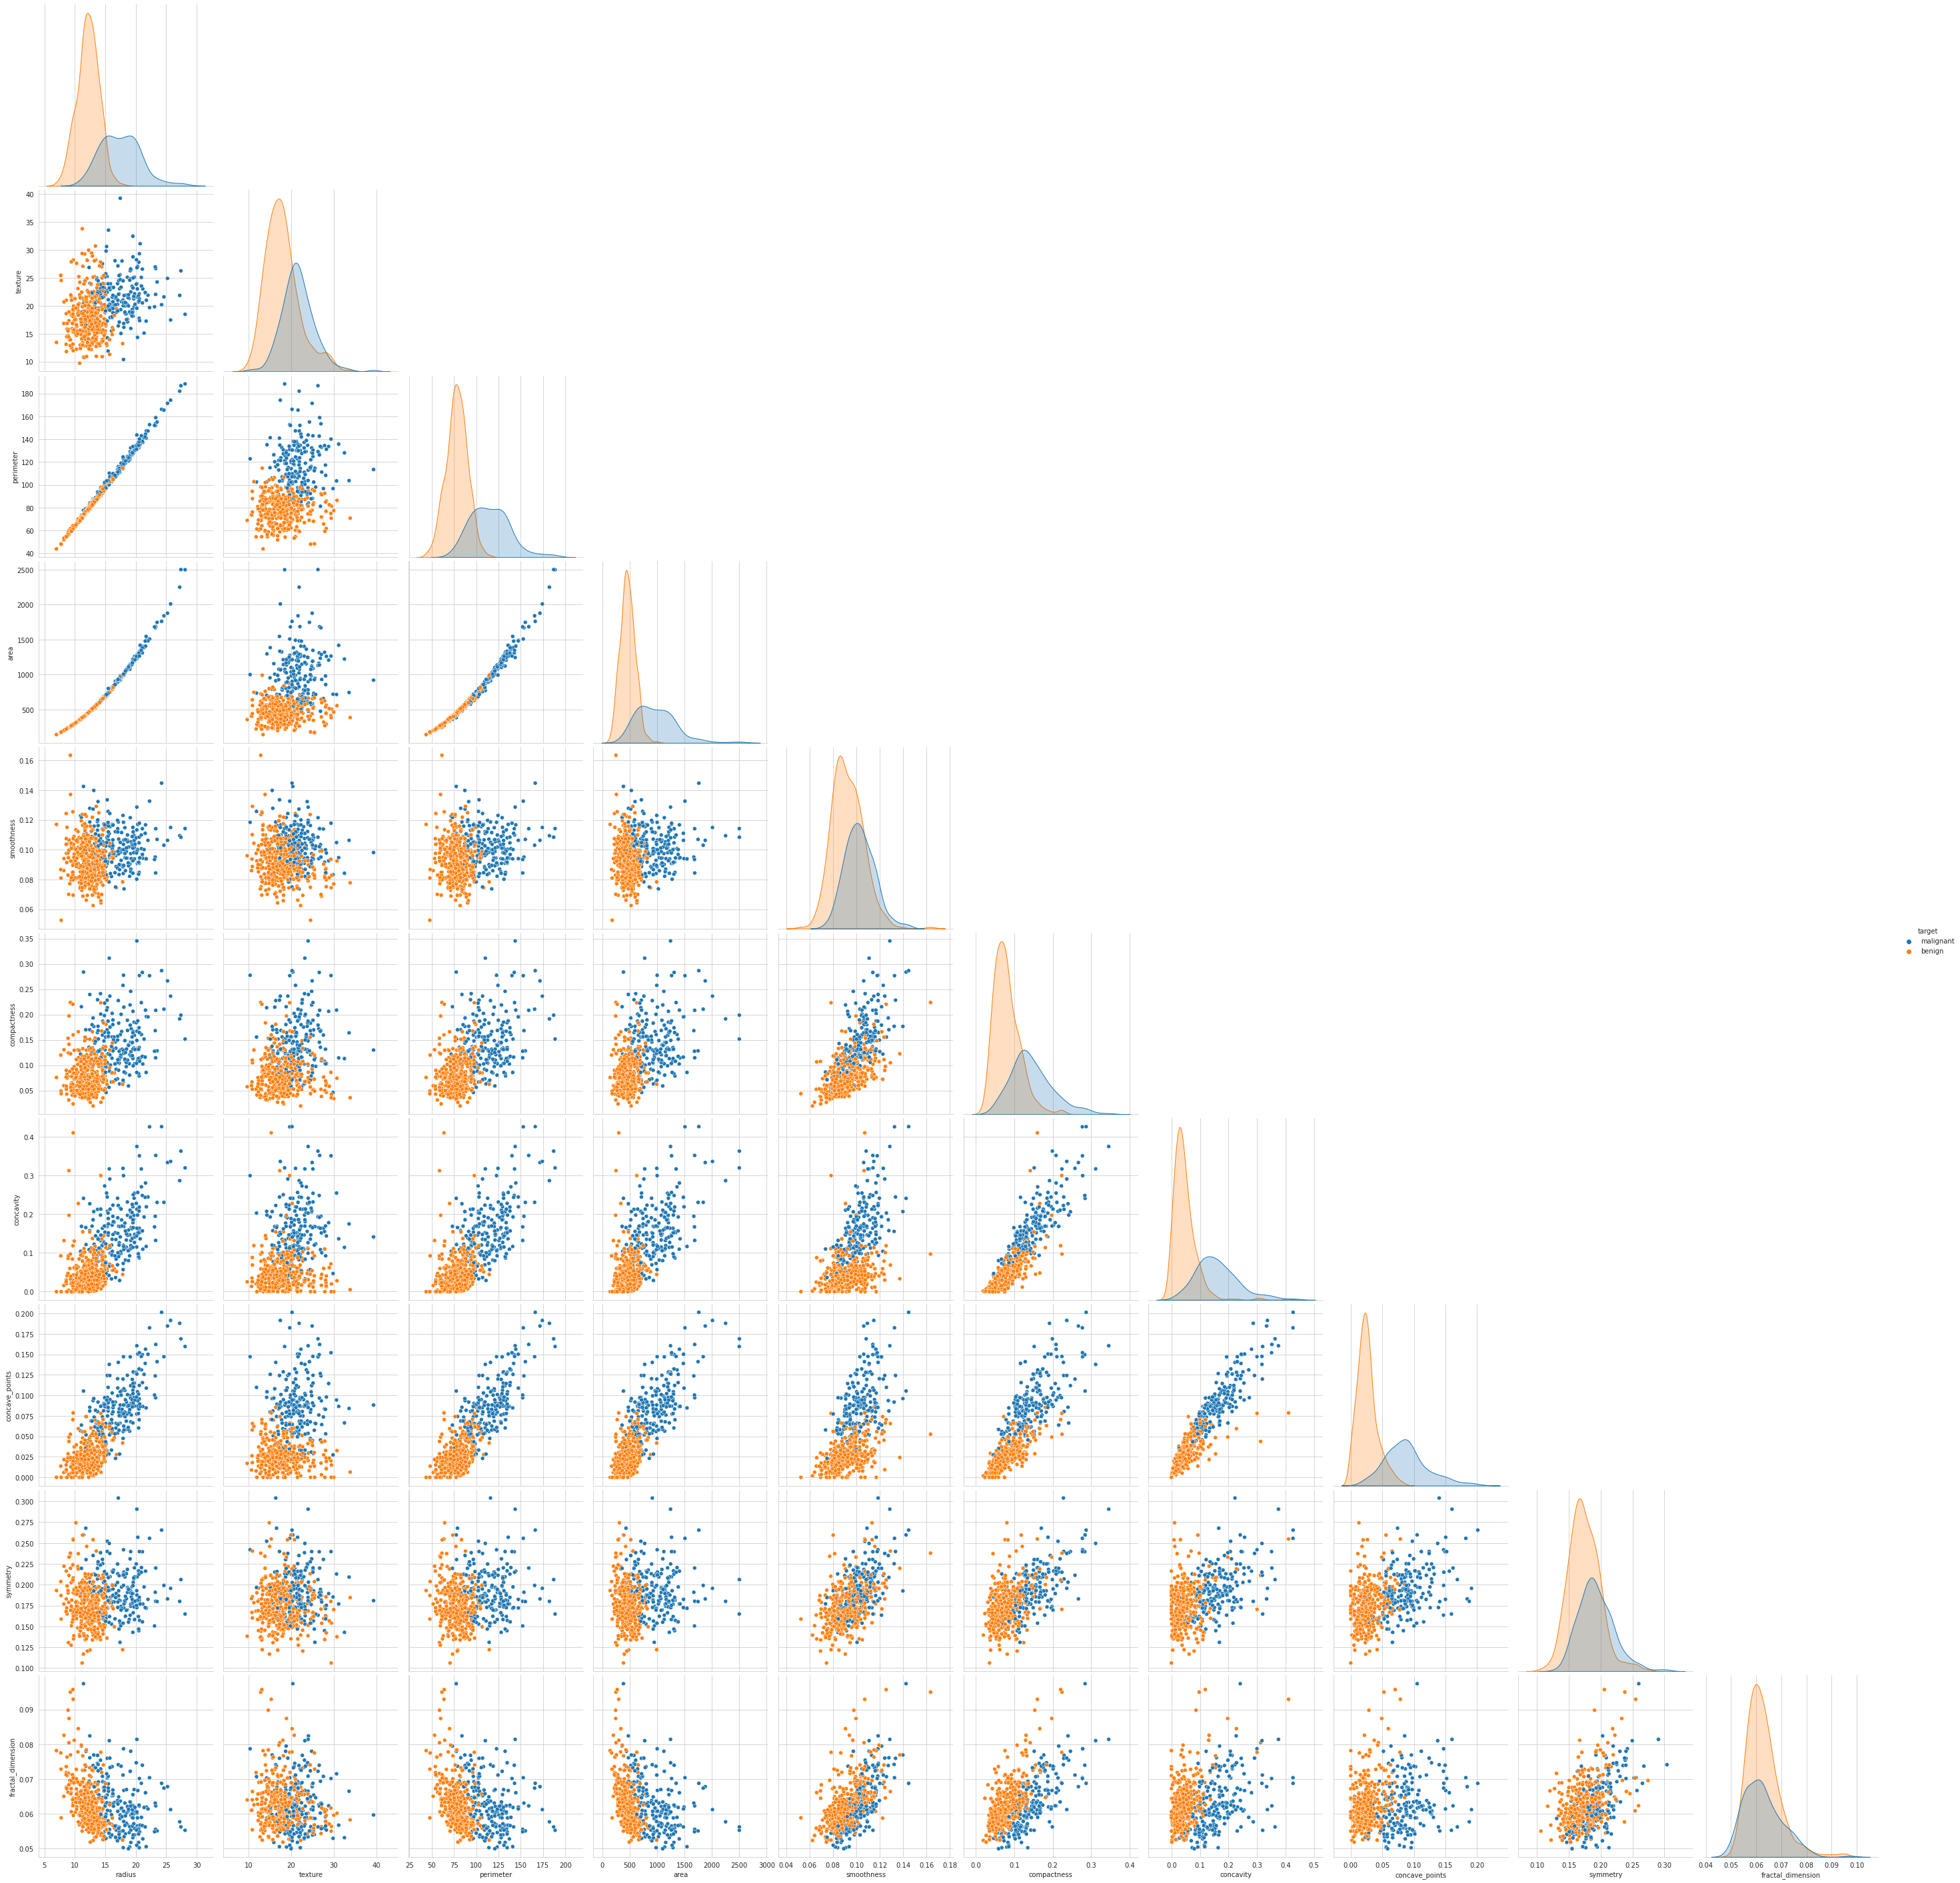

In [32]:
# vamos a ver un diagrama de correlación de todas las columnas contra el target
sns.pairplot(df, hue="target", height=4, corner=True)

<!-- General: 
- vemos que la especie "setosa" podemos separarla por cualquier columna de las otras clases
- las otras clases suelen "mezclarse" la mayoría de las veces. 
- viendo los diagramas de densidad (diagonal) vemos que las mejores columnas para separar entre setosa y las otras son petal_length y petal_width ( o sea petal)

Correlaciones:
- petal_length correlacionada positivamente con petal_width, una crece, la otra también (bastante lineal)
- sepal_length y sepal_width parecen no estar relacionado al igual que el anterior (no es tan fuerte la correlacion)
- sepal_lenght parece estar correlacionados postiviamente con petal, es decir que cuando más largo el sepal, mas aumenta el petal.
- sepal_width parece estar correlacionado negativamente con petal, es decir que cuando más ancho es el sepalo, mas chico es el petalo.  -->

Viendo la distribución bi-variable, la mayoría de las features las podemos separar con una linea las dos clases (según el color). No parece un problema "díficil" de resolver.

Vemos la correlación que hay entre las variables.


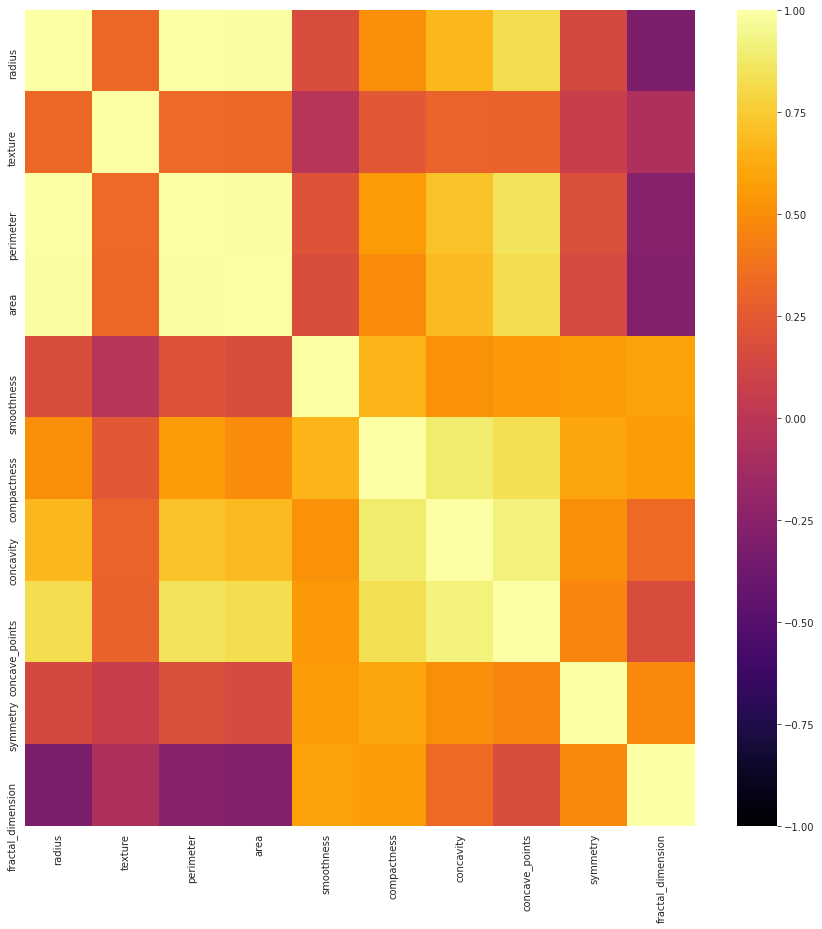

In [33]:
fig, ax = plt.subplots( figsize=(15,15))

# Calculate correlations
corr = df.corr()

# Heatmap
sns.heatmap(corr, vmin=-1, vmax=1, ax = ax, cmap="inferno")

La diagonal muestra las variables contra si mismas, podemos ver en la esquina superior las variables radio, textura, perimetro y area están corelacionadas positivamente y fuerte

Vemos la distribución de las variables con boxplots:
- la linea del medio de la caja es mediana (Q2)
- la lineas superior e inferior son las lineas del Q1 y Q3, es decir se encuentra el 25% de los datos y el 75%.
- entre Q1 y Q3 se encuentra el 50% de los datos de la muestra
- los puntos son valores fuera de rango
- tener en cuenta que los ejes no son los mismos...

In [60]:
# tips = sns.load_dataset("tips")
# tips

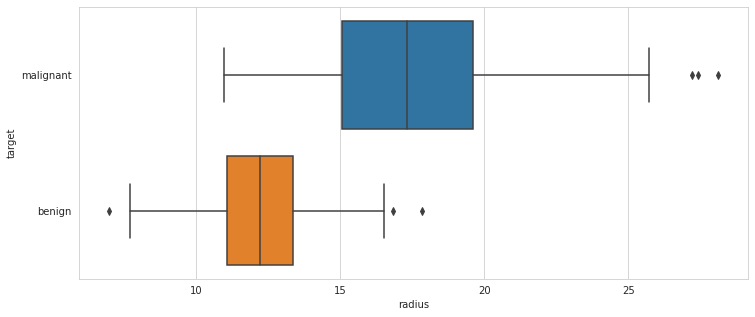

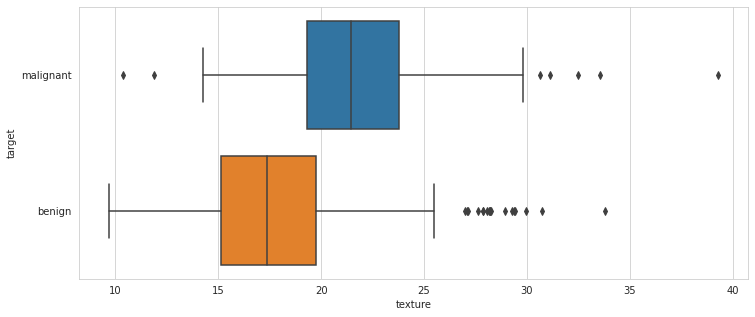

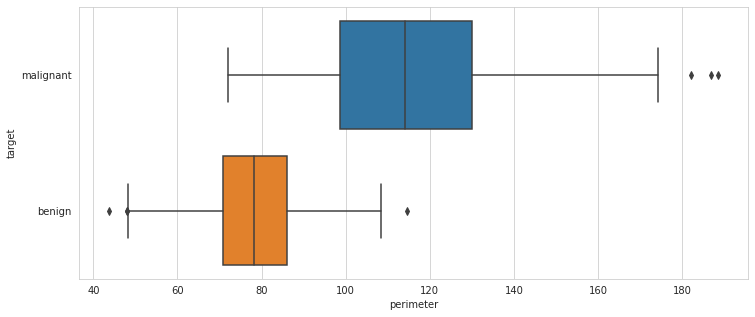

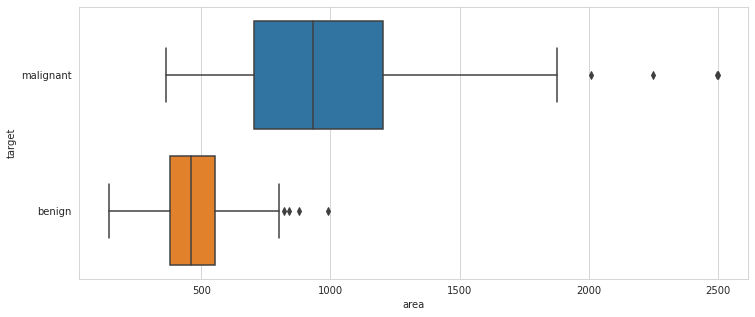

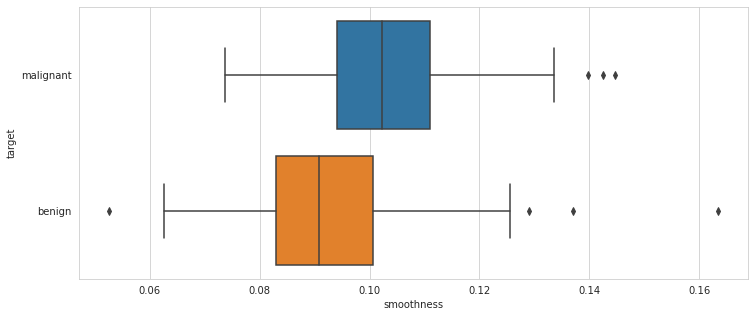

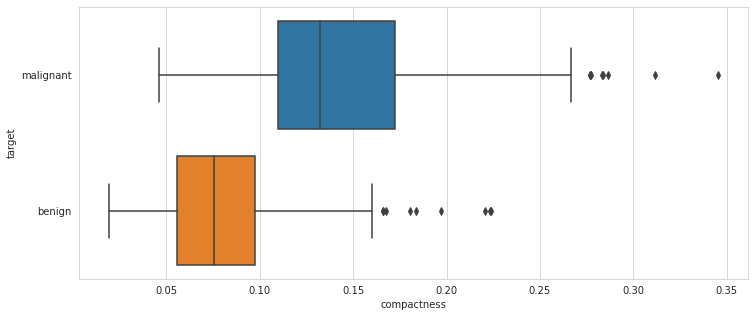

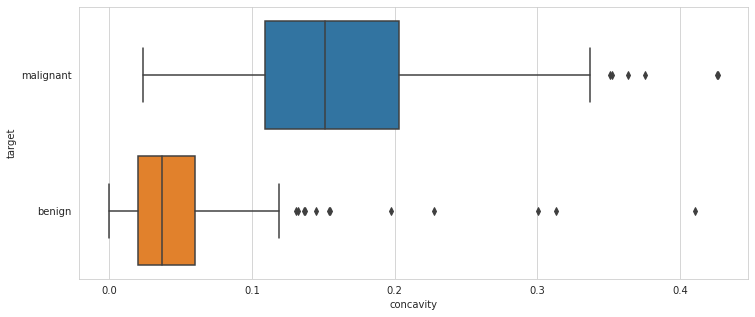

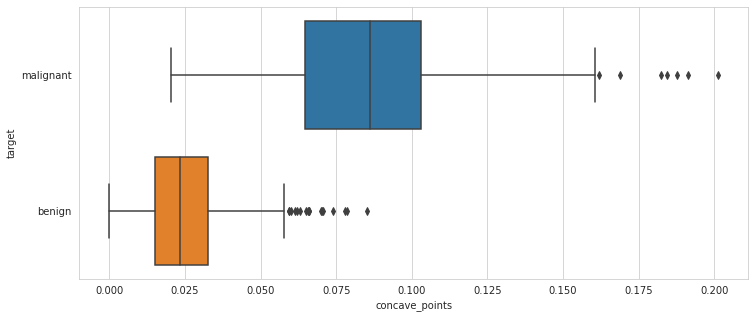

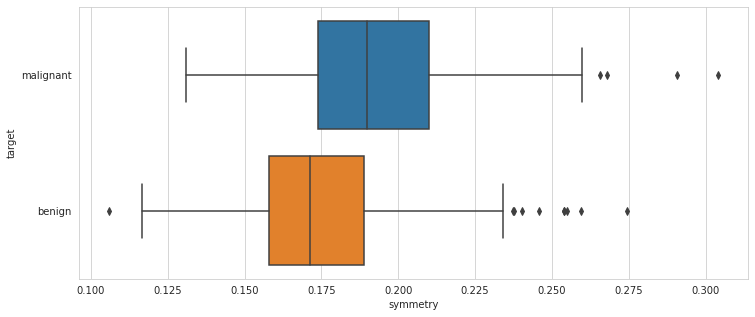

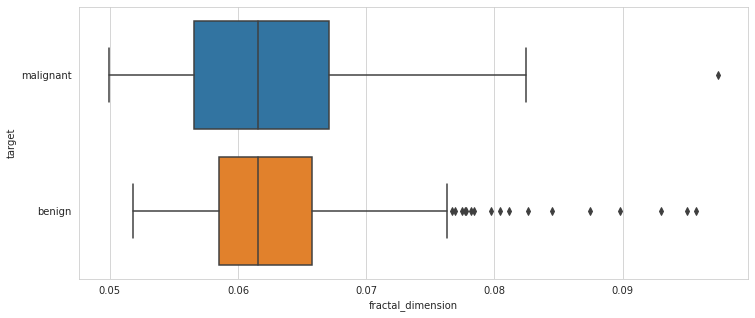

In [35]:
# Vemos la distribución de los datos por columna
# df.loc[:, ~df.columns.isin(['area'])].plot(subplots=True, kind='box', by='target', figsize=(15,25), layout=(10,1), vert=False, sharex=False);
# fig, ax = plt.subplots(nrows=10, figsize=(15,20), sharex=False)

for i, c in enumerate(features):
  if (c != 'target'):
    plt.figure(figsize=(12,5))
    sns.boxplot(x=c, y='target', data=df, orient='h')
    plt.show()


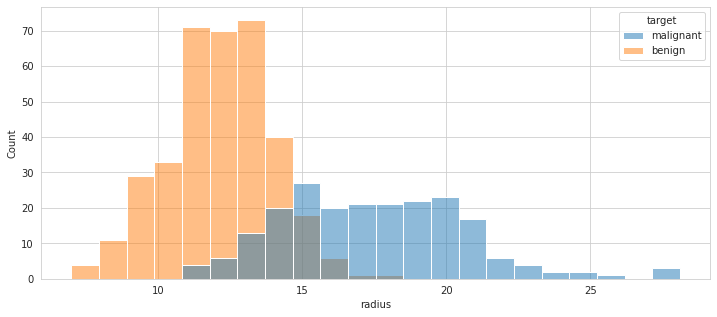

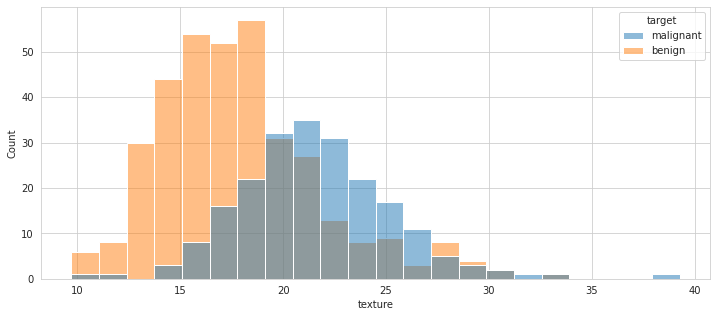

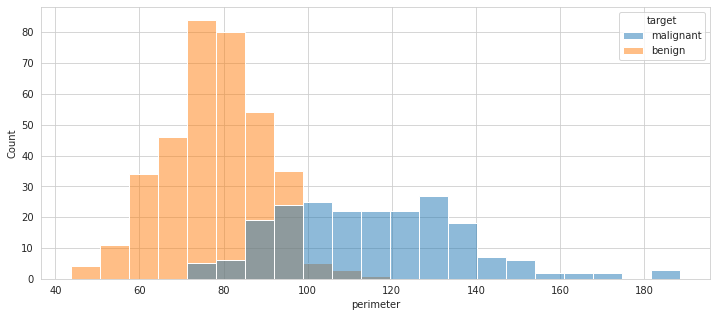

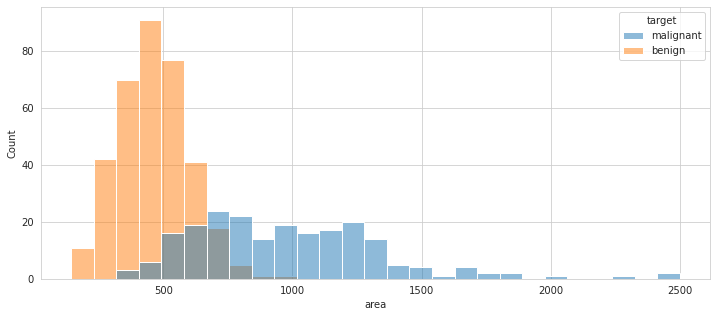

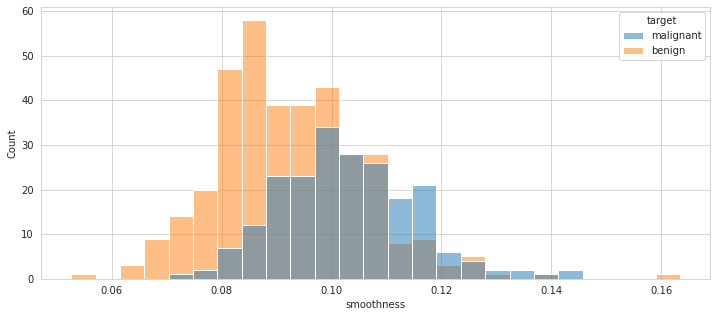

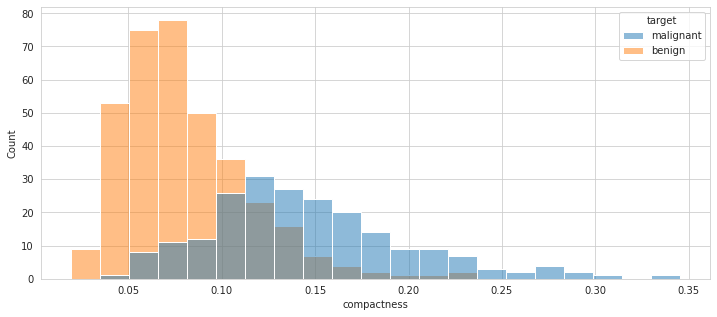

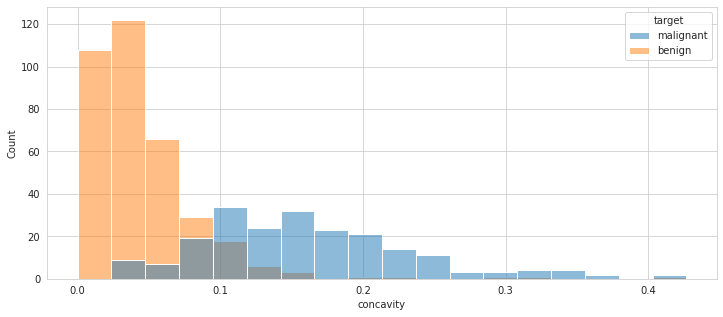

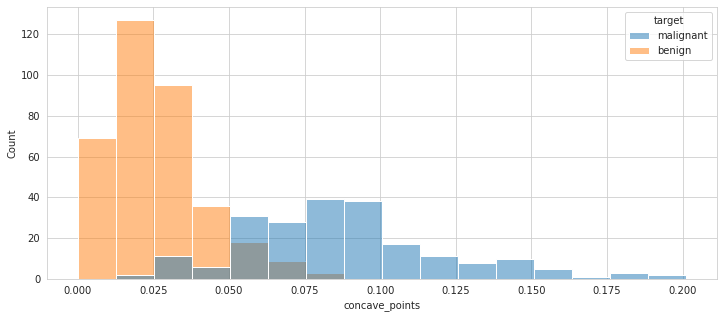

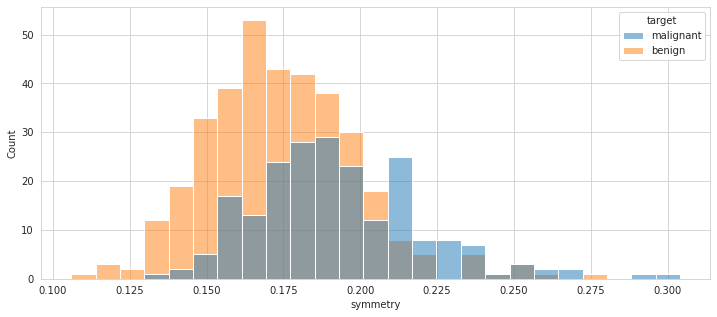

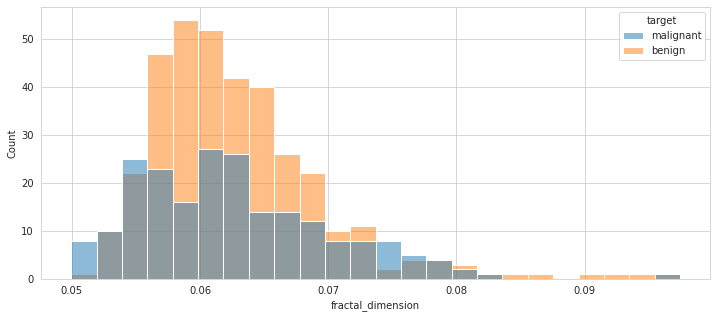

In [36]:
# Vemos la distribución de los datos por columna
# df.plot(kind='density', subplots=True, figsize=(15,20), sharex=False);

for i, c in enumerate(features):
  if (c != 'target'):
    plt.figure(figsize=(12,5))
    sns.histplot(x=c, hue='target', data=df)
    plt.show()

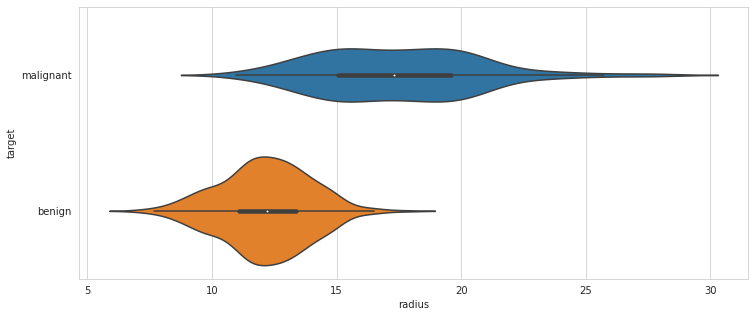

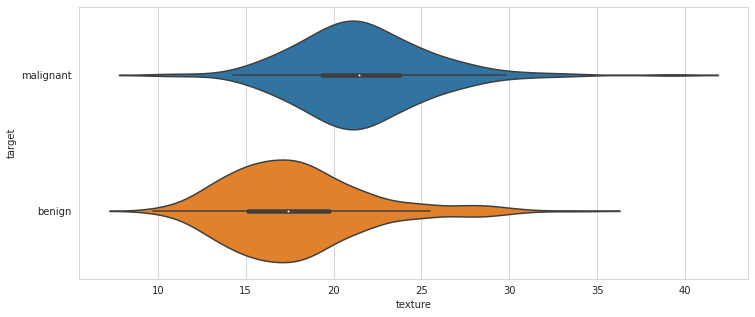

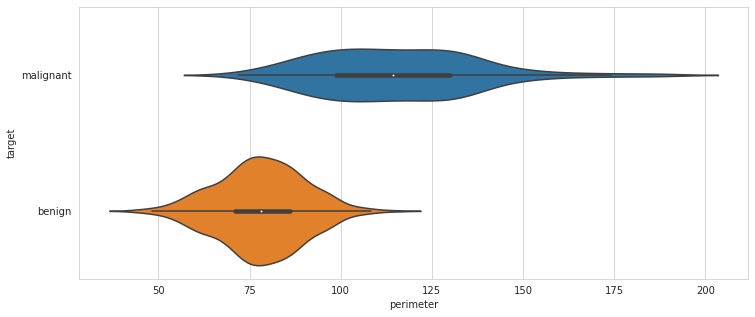

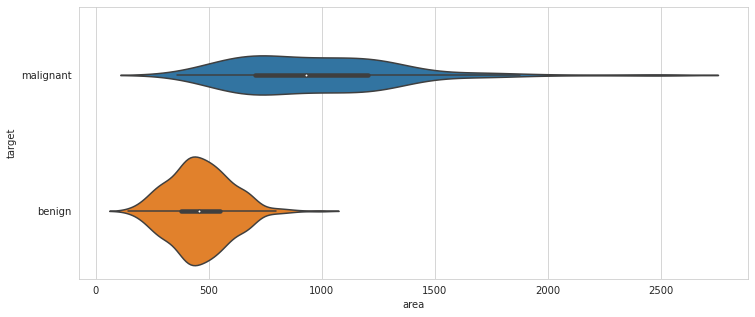

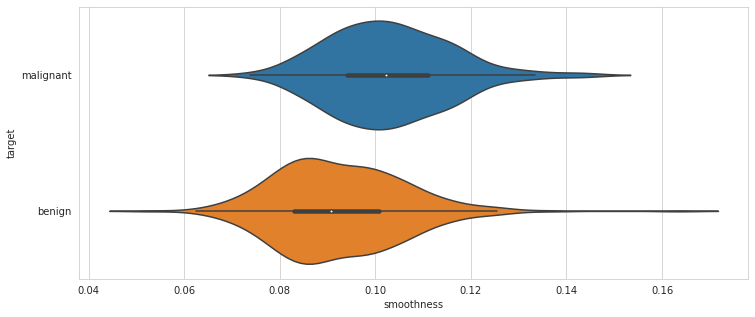

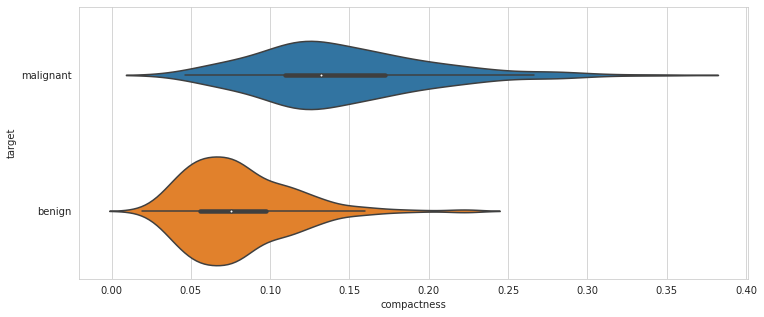

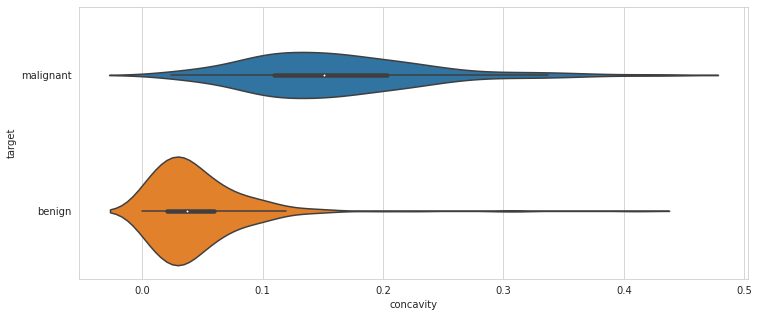

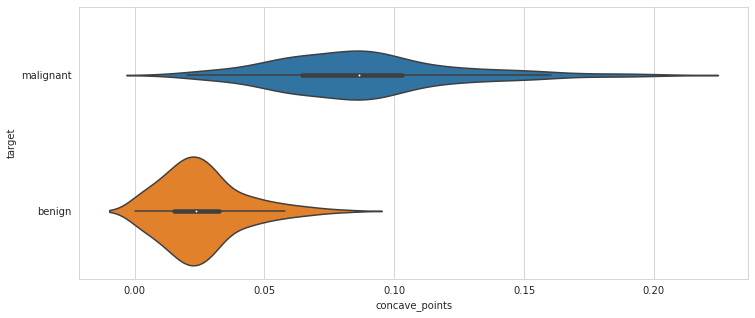

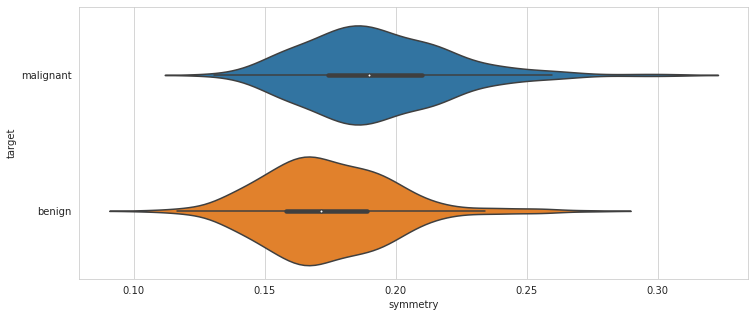

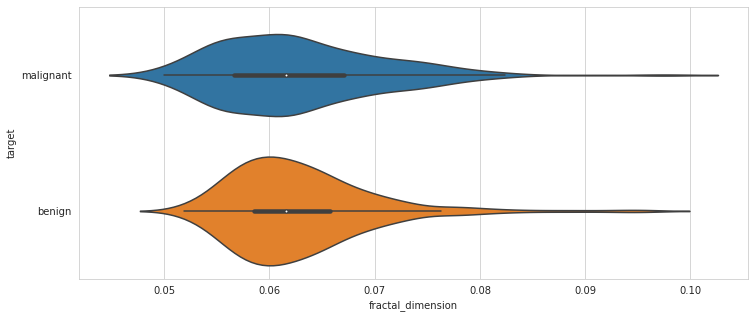

In [37]:
for i, c in enumerate(features):
  if (c != 'target'):
    plt.figure(figsize=(12,5))
    sns.violinplot(x=c, y='target', data=df, split=False)
    plt.show()

## Data Preparation: Feature Engineering
 Luego del analisis exploratorio, podríamos detectar que nuestra información puede tener outliers, missings, escalas diferentes...

 Dependerá el algoritmo las transformaciones que hagamos... EJ: si tenemos columnas en CM y otras en metros, deberíamos estandarizar... si tenemos columnas de texto tendríamos que transformarlas para que el modelo las pueda interpretar... fechas, pasar categorías a dummies o encoding,  tratamiento de datos desbalanceados, etc. 

 Este proceso va de la mano con ETL, en este caso no realizamos ninguna actividad, pero hay que tener en cuenta el siguiente camino...

 -> entendimiento -> preparación -> entrenamiento -> evaluar

 Libros & posts del tema:
 - [Feature Engineering Alice Zheng](https://www.amazon.com/-/es/Alice-Zheng/dp/1491953241)
- https://developers.google.com/machine-learning/data-prep
- https://bookdown.org/max/FES/


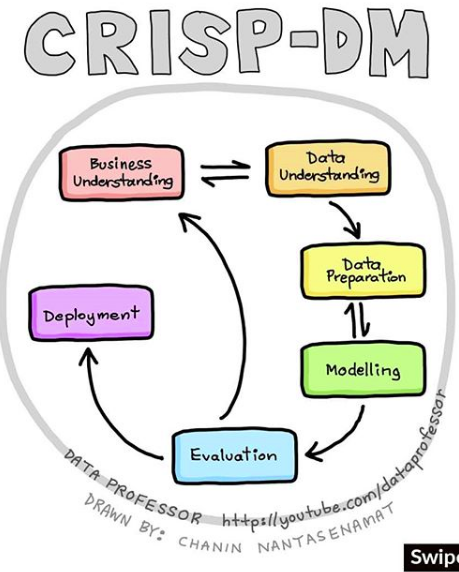

## Entrenamiento: Arbol de decisión

Creamos un árbol de decisión con todo el dataset.

Veremos que es tan facil como darle "train" al modelo. 

En este caso tenemos que elegir un modelo de clasificación, podríamos buscar cual es el mejor. 

El concepto importante acá es el siguiente: 
- entre fácil y complejo, facil. 
- [Navaja de Ockham](https://es.wikipedia.org/wiki/Navaja_de_Ockham)


In [38]:
# En este caso vamos a crear un arbol de decisión simple
from sklearn import tree, linear_model, svm

# creamos las features que vamos a utilizar para predecir
X = df.loc[:, ~df.columns.isin(["target"])]

# creamos nuestro target
y = df.target

# creamos nuestro modelo y lo entrenamos
clf = tree.DecisionTreeClassifier(random_state=42).fit(X, y)
# clf = linear_model.LogisticRegression(max_iter=10).fit(X, y)
# clf = svm.SVC(kernel="linear").fit(X, y)

In [39]:
# obtenemos una predicción sobre todo nuestro dataset para saber "cuanto aprendió"
y_pred = clf.predict(X)
# y_pred

In [40]:
from sklearn.metrics import classification_report

# vemos un reporte de clasificación para observar que fue lo que pasó...
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       357
   malignant       1.00      1.00      1.00       212

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



Lo que sucedió arriba es que nuestro modelo "memorizó" todos los datos, pero no tenemos forma de probarlo en la vida real. 

Lo que vamos a hacer es realizar el split train-test que vimos.



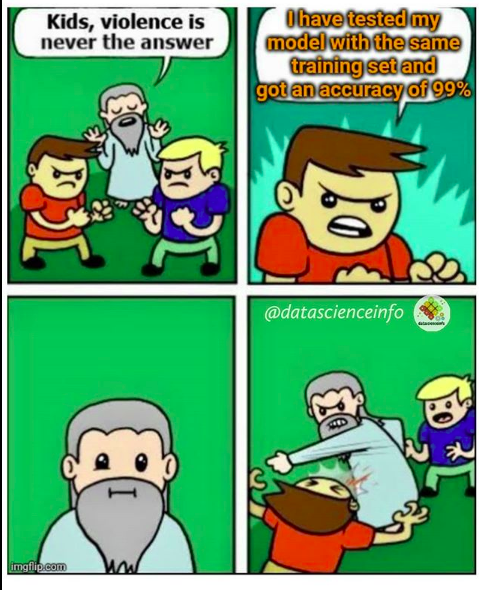

## Split Train-Test & Hyperparameter tuning



### Holdout (split train-test)

La forma de experimentar, es realizando pruebas en ambientes "simulados", o experimentos con nuestro dataset. 

Tenemos distintas formas de testear esto, pero vamos a hacer una simple: 

- Vamos a dividir nuestro dataset en 2, train-test (holdout)
- Con train vamos a intentar generalizar

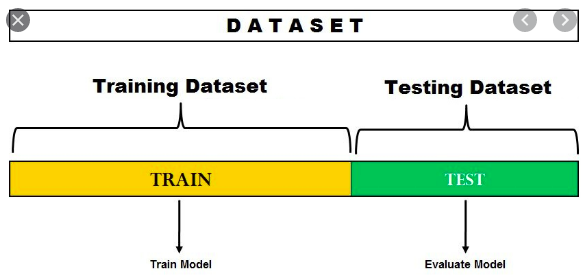

In [41]:
from sklearn.model_selection import train_test_split

# creamos nuestro split en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [42]:
X_train.shape[0], X_test.shape[0]

(398, 171)

In [43]:
# Primero hacemos el ejercicio sin buscar parámetros
model = tree.DecisionTreeClassifier(random_state=42)
# model = linear_model.LogisticRegression(max_iter=10)
# model = svm.SVC(kernel="linear")

model.fit(X_train, y_train)


# obtenemos una predicción sobre todo nuestro dataset para saber "cuanto aprendió"
y_pred = model.predict(X_train)

# vemos un reporte de clasificación para observar que fue lo que pasó...
print("PARTICIÓN TRAIN", 40* "*")
print(classification_report(y_train, y_pred))


# obtenemos una predicción sobre todo nuestro dataset para saber "cuanto aprendió"
y_pred = model.predict(X_test)

# vemos un reporte de clasificación para observar que fue lo que pasó...
print("PARTICIÓN TEST", 40* "*")
print(classification_report(y_test, y_pred))

PARTICIÓN TRAIN ****************************************
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       250
   malignant       1.00      1.00      1.00       148

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

PARTICIÓN TEST ****************************************
              precision    recall  f1-score   support

      benign       0.93      0.93      0.93       107
   malignant       0.89      0.88      0.88        64

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



Podemos observar que en train tuvimos un resultado semejante, pero en test el resultado bajó. 
Ya no tenemos ese 100% de accuracy que teníamos. 


---


### Grid Search & KFold
Vamos a utilizar GridSearch para buscar los parámetros correctos
    - Internamente, GridSearch va a generar K grupos para entrenar los modelos ([Estrategias CV](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)) 
- con Test vamos a simular data nunca antes vista


Intentemos encontrar un parámetro que maximice el recall en train, y luego lo volvemos a probar con test.

Vamos a usar GridSearch pero podríamos usar RandomSearch u otro algoritmo más exhaustivo (TPOT; Hyperopt..., H2O)

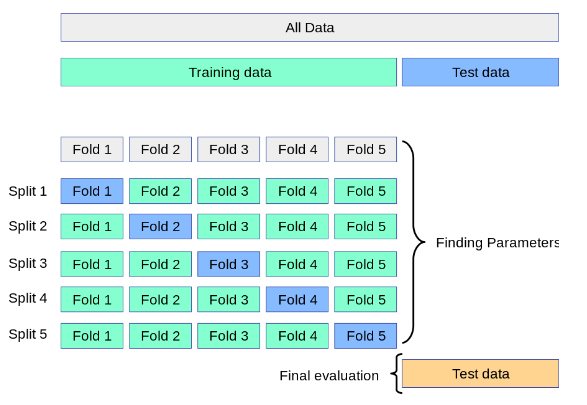

In [44]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedKFold

parameters = {
    
    # estos son de aprendizaje
    'criterion': ["gini", "entropy"],
    
    # todos estos parametros son de regularización
    'max_depth':[1, 3, 8, 12, 20], # la profundidad máxima del árbol.
    'min_samples_split': [2, 3, 4], # número mínimo de muestras necesarias antes de dividir este nodo. 
    'min_samples_leaf': [1,2,3], # número mínimo de muestras que debe haber en un nodo final (hoja). 
    'max_leaf_nodes': [5,10,15,20,25] # número máximo de nodos finales
}

model = tree.DecisionTreeClassifier(random_state=42)

gs_clf = GridSearchCV(model, parameters, scoring = 'recall_macro', cv = StratifiedKFold(3), refit=True, )
gs_clf.fit(X_train, y_train)

# Decimos que nos muestre la data nunca antes vista
clf = gs_clf.best_estimator_

print("Mejores hiperparámetros:", gs_clf.best_params_)
print("Cantidad de modelos entrenados: ", len(gs_clf.cv_results_["mean_fit_time"]))


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cantidad de modelos entrenados:  450
CPU times: user 7.55 s, sys: 11.8 ms, total: 7.56 s
Wall time: 7.58 s


In [45]:
# resultados del grid-search
pd.DataFrame.from_dict(gs_clf.cv_results_).sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
253,0.002464,0.000012,0.001964,0.000038,entropy,1,20,1,3,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.919880,0.895408,0.841406,0.885565,0.032784,361
50,0.002638,0.000009,0.001913,0.000005,gini,3,5,2,4,"{'criterion': 'gini', 'max_depth': 3, 'max_lea...",0.917952,0.931973,0.886403,0.912109,0.019057,178
125,0.002876,0.000039,0.001945,0.000023,gini,8,20,3,4,"{'criterion': 'gini', 'max_depth': 8, 'max_lea...",0.925904,0.915816,0.853946,0.898555,0.031811,325
260,0.002402,0.000038,0.001931,0.000031,entropy,1,20,3,4,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.919880,0.895408,0.841406,0.885565,0.032784,361
158,0.002881,0.000047,0.001944,0.000008,gini,12,15,2,4,"{'criterion': 'gini', 'max_depth': 12, 'max_le...",0.937952,0.915816,0.859970,0.904580,0.032812,277


In [46]:
print("TRAINING", 40*"*")
# obtenemos una predicción sobre todo nuestro dataset para saber "cuanto aprendió"
y_pred = clf.predict(X_train)

# vemos un reporte de clasificación para observar que fue lo que pasó...
print(classification_report(y_train, y_pred))

print("TEST", 40*"*")
# obtenemos una predicción sobre todo nuestro dataset para saber "cuanto aprendió"
y_pred = clf.predict(X_test)

# vemos un reporte de clasificación para observar que fue lo que pasó...
print(classification_report(y_test, y_pred))

TRAINING ****************************************
              precision    recall  f1-score   support

      benign       0.98      1.00      0.99       250
   malignant       0.99      0.97      0.98       148

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.99      0.98      0.98       398

TEST ****************************************
              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       107
   malignant       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [47]:

from sklearn.metrics import recall_score
threshold = 0.9 #@param {type:"slider", min:0, max:1, step:0.05}

y_pred_t = clf.predict_proba(X_test)[:,1]
y_pred_t = list(map(lambda d: clf.classes_[d], (y_pred_t > threshold).astype(int)))

print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       107
   malignant       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Ahora podemos ver que mejoramos en el recall para test.

In [59]:
# serializamos el modelo para utilizarlo donde querramos
import pickle
with open('breast_tree_model.pickle', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)
r


array(['benign', 'malignant'], dtype=object)

## Interpretabilidad

El poder de los datos es incalculable, pero tenemos que saber porque vamos a tomar una determinada decisión. 

En este caso, este modelo es "white-box", es decir podemos meternos dentro e interpretarlo directamente. Hay otros casos que son más dificiles, por ejemplo ensembles y redes neuronales. 

[Interpretable ML](https://christophm.github.io/interpretable-ml-book/)

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave_points', 'symmetry', 'fractal_dimension'],
      dtype='object')


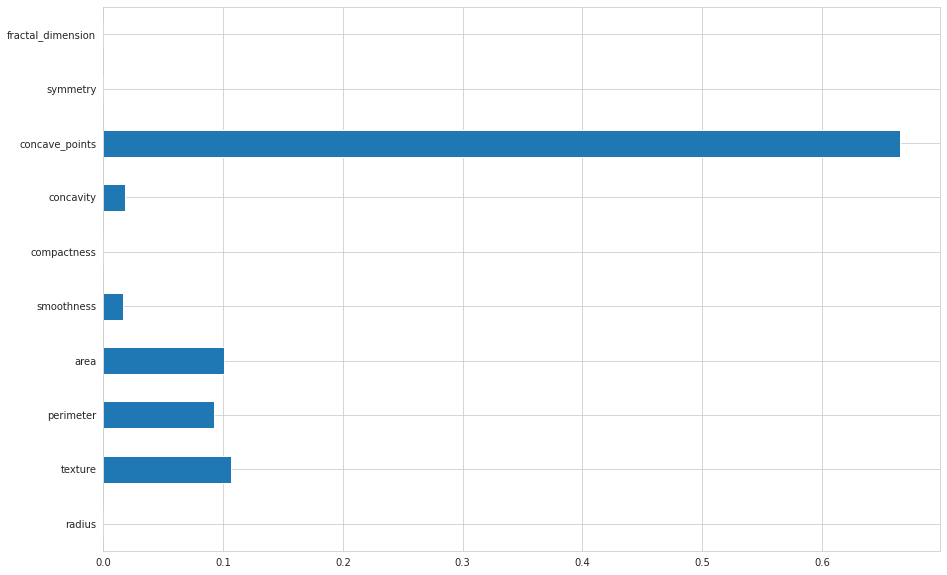

In [69]:
pd.Series(clf.feature_importances_, index=X.columns).plot.barh(figsize=(15,10))
print(X.columns)

In [49]:
# Podemos ver el arbol generado como reglas de asociación
print(tree.export_text(clf, feature_names=list(X.columns)))

|--- concave_points <= 0.05
|   |--- area <= 696.25
|   |   |--- class: benign
|   |--- area >  696.25
|   |   |--- texture <= 18.68
|   |   |   |--- class: benign
|   |   |--- texture >  18.68
|   |   |   |--- class: malignant
|--- concave_points >  0.05
|   |--- perimeter <= 102.85
|   |   |--- texture <= 20.25
|   |   |   |--- concave_points <= 0.08
|   |   |   |   |--- texture <= 16.22
|   |   |   |   |   |--- class: benign
|   |   |   |   |--- texture >  16.22
|   |   |   |   |   |--- smoothness <= 0.09
|   |   |   |   |   |   |--- class: benign
|   |   |   |   |   |--- smoothness >  0.09
|   |   |   |   |   |   |--- concavity <= 0.10
|   |   |   |   |   |   |   |--- class: benign
|   |   |   |   |   |   |--- concavity >  0.10
|   |   |   |   |   |   |   |--- class: malignant
|   |   |   |--- concave_points >  0.08
|   |   |   |   |--- class: malignant
|   |   |--- texture >  20.25
|   |   |   |--- class: malignant
|   |--- perimeter >  102.85
|   |   |--- class: malignant



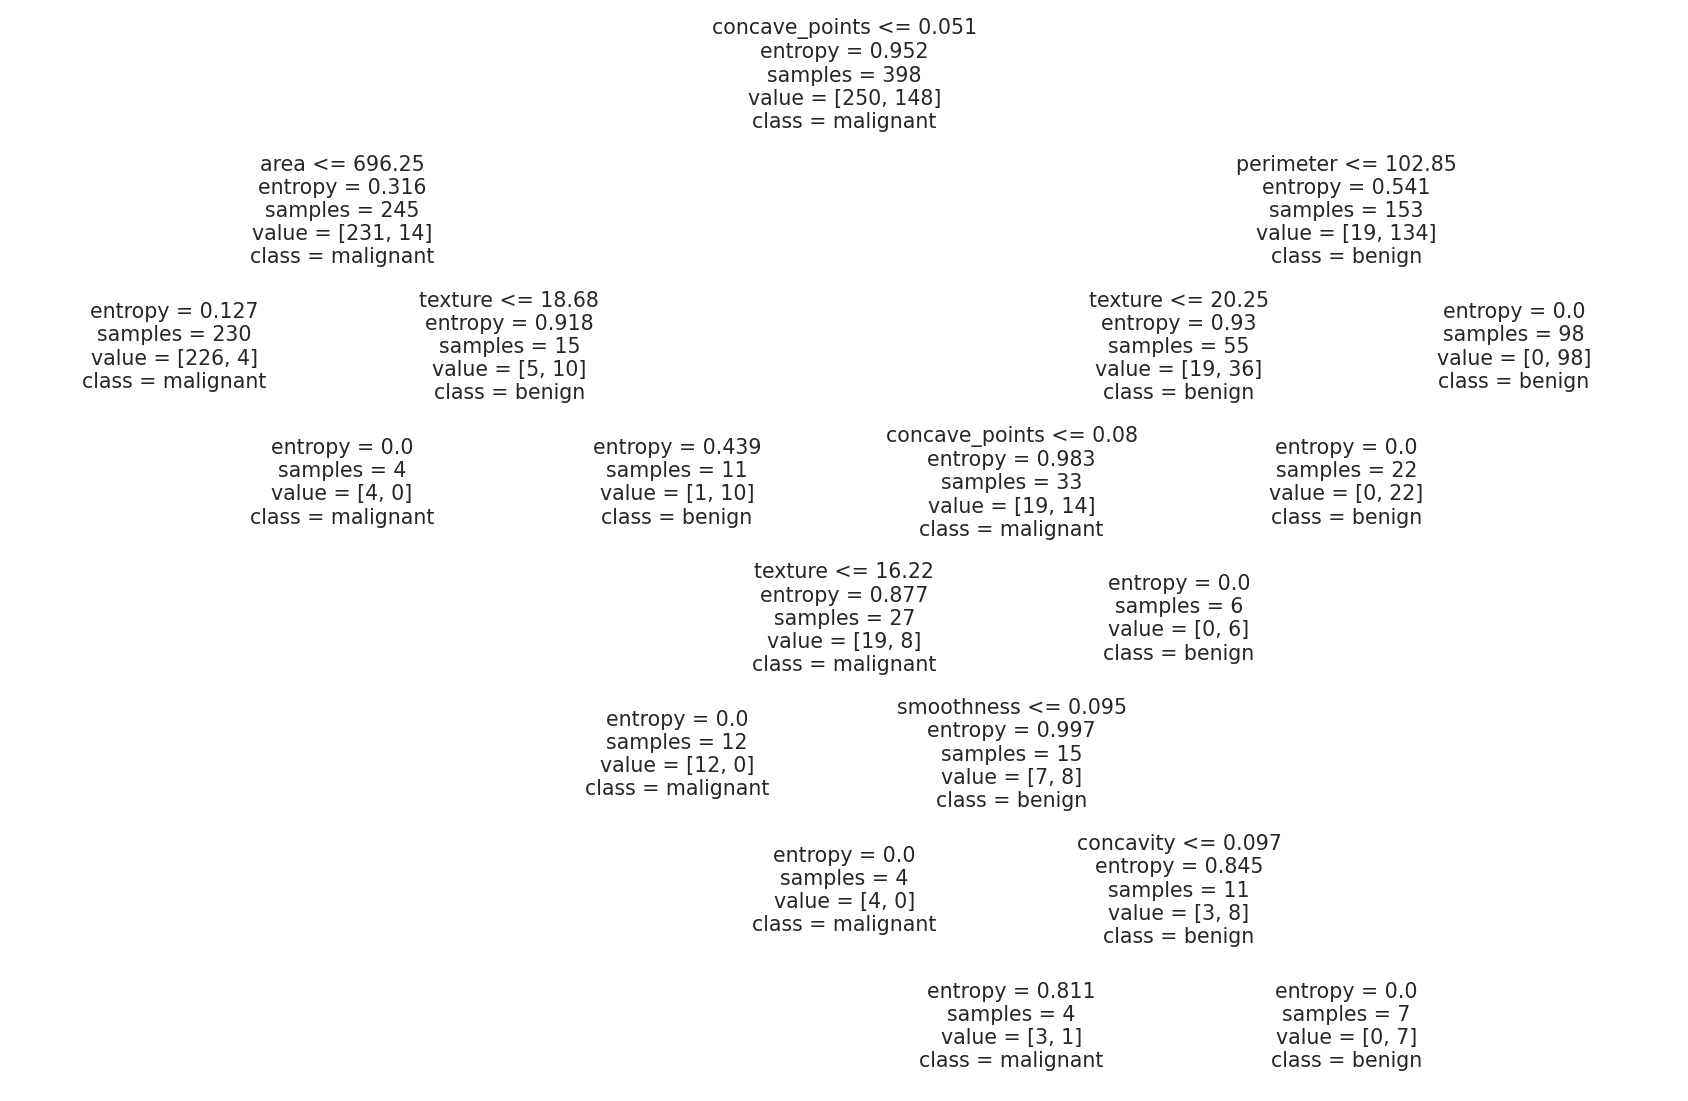

In [50]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1,figsize=(30,20))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=list(y.unique()), ax=ax) ;

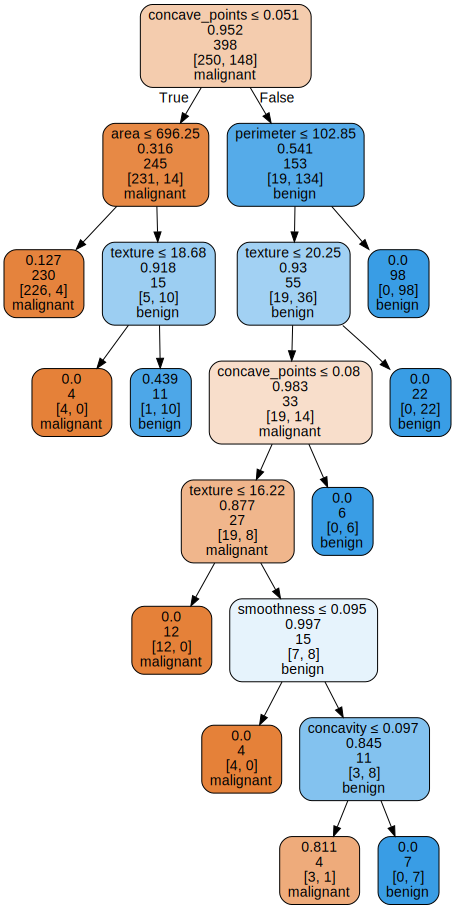

In [51]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(X.columns), class_names=list(y.unique()), 
                     filled=True, rounded=True,  label=None,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Info Anexa

Esta info se guarda para ver más tarde



In [52]:
Xt = X_train.copy()
Xts = X_test.copy()
Xt["train"] = True
Xts["train"] = False

yt = y_train.copy().to_frame()
yts = y_test.copy().to_frame()
yt["predict"] = clf.predict(X_train)
yts["predict"] = clf.predict(X_test)



In [53]:
yt = yt.join(pd.DataFrame(clf.predict_proba(X_train), columns="prob_"+clf.classes_, index=yt.index))
yts = yts.join(pd.DataFrame(clf.predict_proba(X_test), columns="prob_"+clf.classes_, index=yts.index))

In [54]:
yt.append(yts)

,target,predict,prob_benign,prob_malignant
id,,,,
8610862,malignant,malignant,0.000000,1.000000
896839,malignant,malignant,0.000000,1.000000
9013594,benign,benign,0.982609,0.017391
881094802,malignant,malignant,0.000000,1.000000
861598,benign,benign,1.000000,0.000000
...,...,...,...,...
8610175,benign,benign,0.982609,0.017391
855138,malignant,malignant,0.000000,1.000000
862548,malignant,benign,0.750000,0.250000


In [55]:
Xt.append(Xts).join(yt.append(yts)).to_excel('breast_predictions.xls', index=False)